# Paso 1: Recopilación de Datos
Recopilar datos históricos reales sobre eventos delictivos en Lima Cercado es el primer paso. Esto incluira información como la fecha, la hora, la ubicación geográfica, el tipo de delito, las condiciones climáticas y otros factores relevantes. Idealmente, se obtendría acceso a bases de datos de la policía local o de fuentes gubernamentales.

# Paso 2: Preprocesamiento de Datos
teniendo los datos, se  realizara el preprocesamiento necesario, que incluye la limpieza de datos, la eliminación de valores atípicos y la codificación de variables categóricas. También puede ser útil crear características adicionales, como características de temporada o tendencias históricas.

# Paso 3: Diseño de la Red Neuronal
Luego se Diseñara una red neuronal adecuada para este tipo de predicción es fundamental. Se utilizara arquitectura de redes neuronales profundas, como redes neuronales recurrentes (RNN) o redes neuronales convolucionales (CNN), dependiendo de la naturaleza de los datos.

# Paso 4: Validación y Ajuste
Entrenado el modelo, es esencial evaluar su rendimiento utilizando métricas apropiadas y técnicas de validación cruzada. Si el modelo no cumple con los estándares de precisión necesarios, deberás ajustar la arquitectura de la red, los hiperparámetros y considerar la recopilación de más datos.

# Paso 5: Implementación en Tiempo Real
Finalmente, si el modelo cumple con los requisitos, puedes implementarlo en un sistema en tiempo real para que la policía pueda utilizarlo para predecir eventos delictivos en Lima Cercado por medio de un Api que consumira la aplicacion Movil.


####  Modelo predictivo de redes neuronales basado en inteligencia artificial predecir eventos delictivos a que ayude a la policía a combatirla en las zonas urbanas de la ciudad de Lima Cercado, usando Inteligencia artificial de tipo redes neuronales

In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


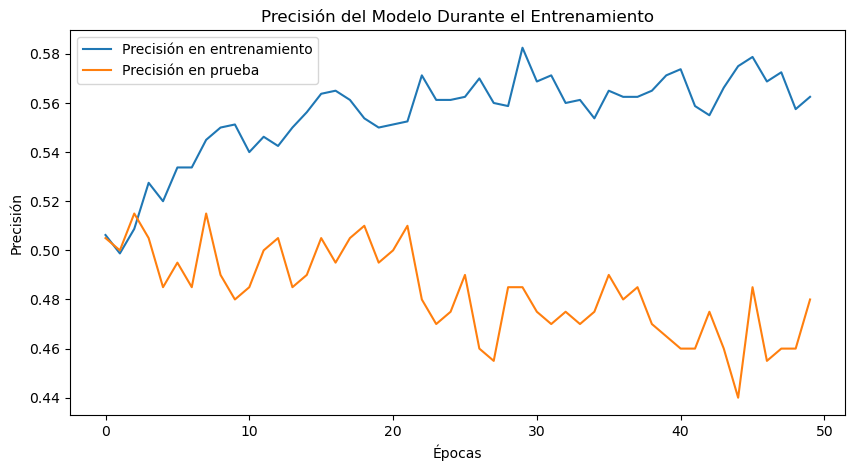

7/7 [==============================] - 0s 1ms/step


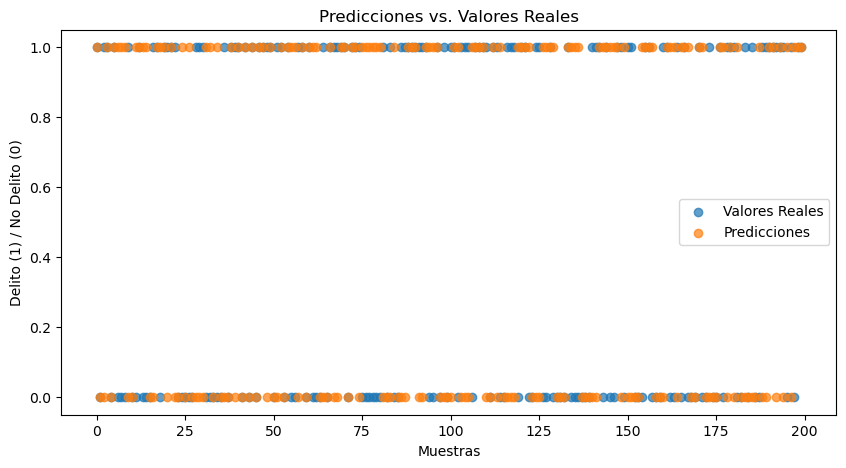

In [10]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Crear datos ficticios (reemplazar con datos reales)
np.random.seed(0)
n_samples = 1000
data = pd.DataFrame({
    'Hora': np.random.randint(0, 24, n_samples),
    'DiaDeLaSemana': np.random.randint(0, 7, n_samples),
    'Ubicacion': np.random.randint(0, 10, n_samples),
    'EventoDelictivo': np.random.randint(0, 2, n_samples)  # 0: No delito, 1: Delito
})

# Dividir datos en entrenamiento y prueba
X = data[['Hora', 'DiaDeLaSemana', 'Ubicacion']]
y = data['EventoDelictivo']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar una red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# Graficar la precisión del modelo durante el entrenamiento
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en prueba')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión del Modelo Durante el Entrenamiento')
plt.show()

# Realizar predicciones con el modelo
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Graficar las predicciones vs. los valores reales
plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, label='Valores Reales', alpha=0.7)
plt.scatter(range(len(y_test)), y_pred_binary, label='Predicciones', alpha=0.7)
plt.xlabel('Muestras')
plt.ylabel('Delito (1) / No Delito (0)')
plt.legend()
plt.title('Predicciones vs. Valores Reales')
plt.show()
